In [1]:
from BoxingRecognition.util import DataUtility
from BoxingRecognition.util import EvaluationUtility

# Load aggregate_df
aggregate_df = DataUtility.get_aggregate_df(drop_unlabeled_data=False, sessions=[1,2,3,4])

# Print head of the DataFrame
aggregate_df

Session 1:
Label statistics (raw data):
Label 0.0: 104 sequences, Average Length: 52.02
Label 1.0: 20 sequences, Average Length: 47.15
Label 2.0: 20 sequences, Average Length: 45.95
Label 3.0: 21 sequences, Average Length: 57.19
Label 4.0: 21 sequences, Average Length: 59.62
Label 5.0: 21 sequences, Average Length: 59.43


Session 2:
Label statistics (raw data):
Label 0.0: 203 sequences, Average Length: 29.12
Label 1.0: 41 sequences, Average Length: 37.90
Label 2.0: 40 sequences, Average Length: 40.27
Label 3.0: 40 sequences, Average Length: 50.88
Label 4.0: 40 sequences, Average Length: 53.20
Label 5.0: 41 sequences, Average Length: 55.34

Session 3:
Label statistics (raw data):
Label 0.0: 497 sequences, Average Length: 15.12
Label 1.0: 99 sequences, Average Length: 36.00
Label 2.0: 100 sequences, Average Length: 32.44
Label 3.0: 99 sequences, Average Length: 41.83
Label 4.0: 100 sequences, Average Length: 45.08
Label 5.0: 98 sequences, Average Length: 43.55

Session 4:
Label statisti

,time,sensor_accX,sensor_accY,sensor_accZ,sensor_gyroX,sensor_gyroY,sensor_gyroZ,sensor_magX,sensor_magY,sensor_magZ,label
0,881098,2.408722,9.009828,-2.314813,-0.579272,0.190550,-0.304880,50.700000,-177.30000,-30.900002,0.0
1,881138,2.339935,8.889601,-2.336945,-0.282014,0.000000,-0.182928,45.900000,-177.30000,-30.900002,0.0
2,881159,2.357880,9.000258,-2.307635,-0.236282,0.045732,-0.198172,57.900000,-177.30000,-30.900002,0.0
3,881179,2.335150,9.017604,-2.310626,-0.243904,0.137196,-0.289636,55.500004,-174.90001,-32.100002,0.0
4,881223,2.332159,8.911134,-2.304645,-0.236282,0.342990,-0.525918,45.900000,-170.10000,-32.100002,0.0
...,...,...,...,...,...,...,...,...,...,...,...
90808,2017780,-3.068473,8.761000,-2.502630,1.204276,-1.295740,1.623486,182.700010,-138.90001,-20.100000,0.0
90809,2017801,-2.976359,8.671877,-2.173053,1.471046,-1.356716,2.522882,182.700010,-141.30000,-23.100000,0.0
90810,2017821,-2.969182,8.140128,-2.190400,1.684462,-0.884152,3.048800,192.300000,-134.10000,-14.100000,0.0
90811,2017841,-2.842376,8.329141,-2.303449,2.004586,-0.472564,3.765268,185.100000,-129.30000,-17.700000,0.0


In [2]:
# Print label information
EvaluationUtility.print_label_information(aggregate_df)

Label statistics (raw data):
Label 0.0: 1298 sequences, Average Length: 25.21
Label 1.0: 260 sequences, Average Length: 36.79
Label 2.0: 260 sequences, Average Length: 37.06
Label 3.0: 259 sequences, Average Length: 49.98
Label 4.0: 259 sequences, Average Length: 51.46
Label 5.0: 259 sequences, Average Length: 48.69


In [3]:
# Print information about the DataFrame
aggregate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90813 entries, 0 to 90812
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   time          90813 non-null  int64  
 1   sensor_accX   90813 non-null  float64
 2   sensor_accY   90813 non-null  float64
 3   sensor_accZ   90813 non-null  float64
 4   sensor_gyroX  90813 non-null  float64
 5   sensor_gyroY  90813 non-null  float64
 6   sensor_gyroZ  90813 non-null  float64
 7   sensor_magX   90813 non-null  float64
 8   sensor_magY   90813 non-null  float64
 9   sensor_magZ   90813 non-null  float64
 10  label         90813 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 7.6 MB


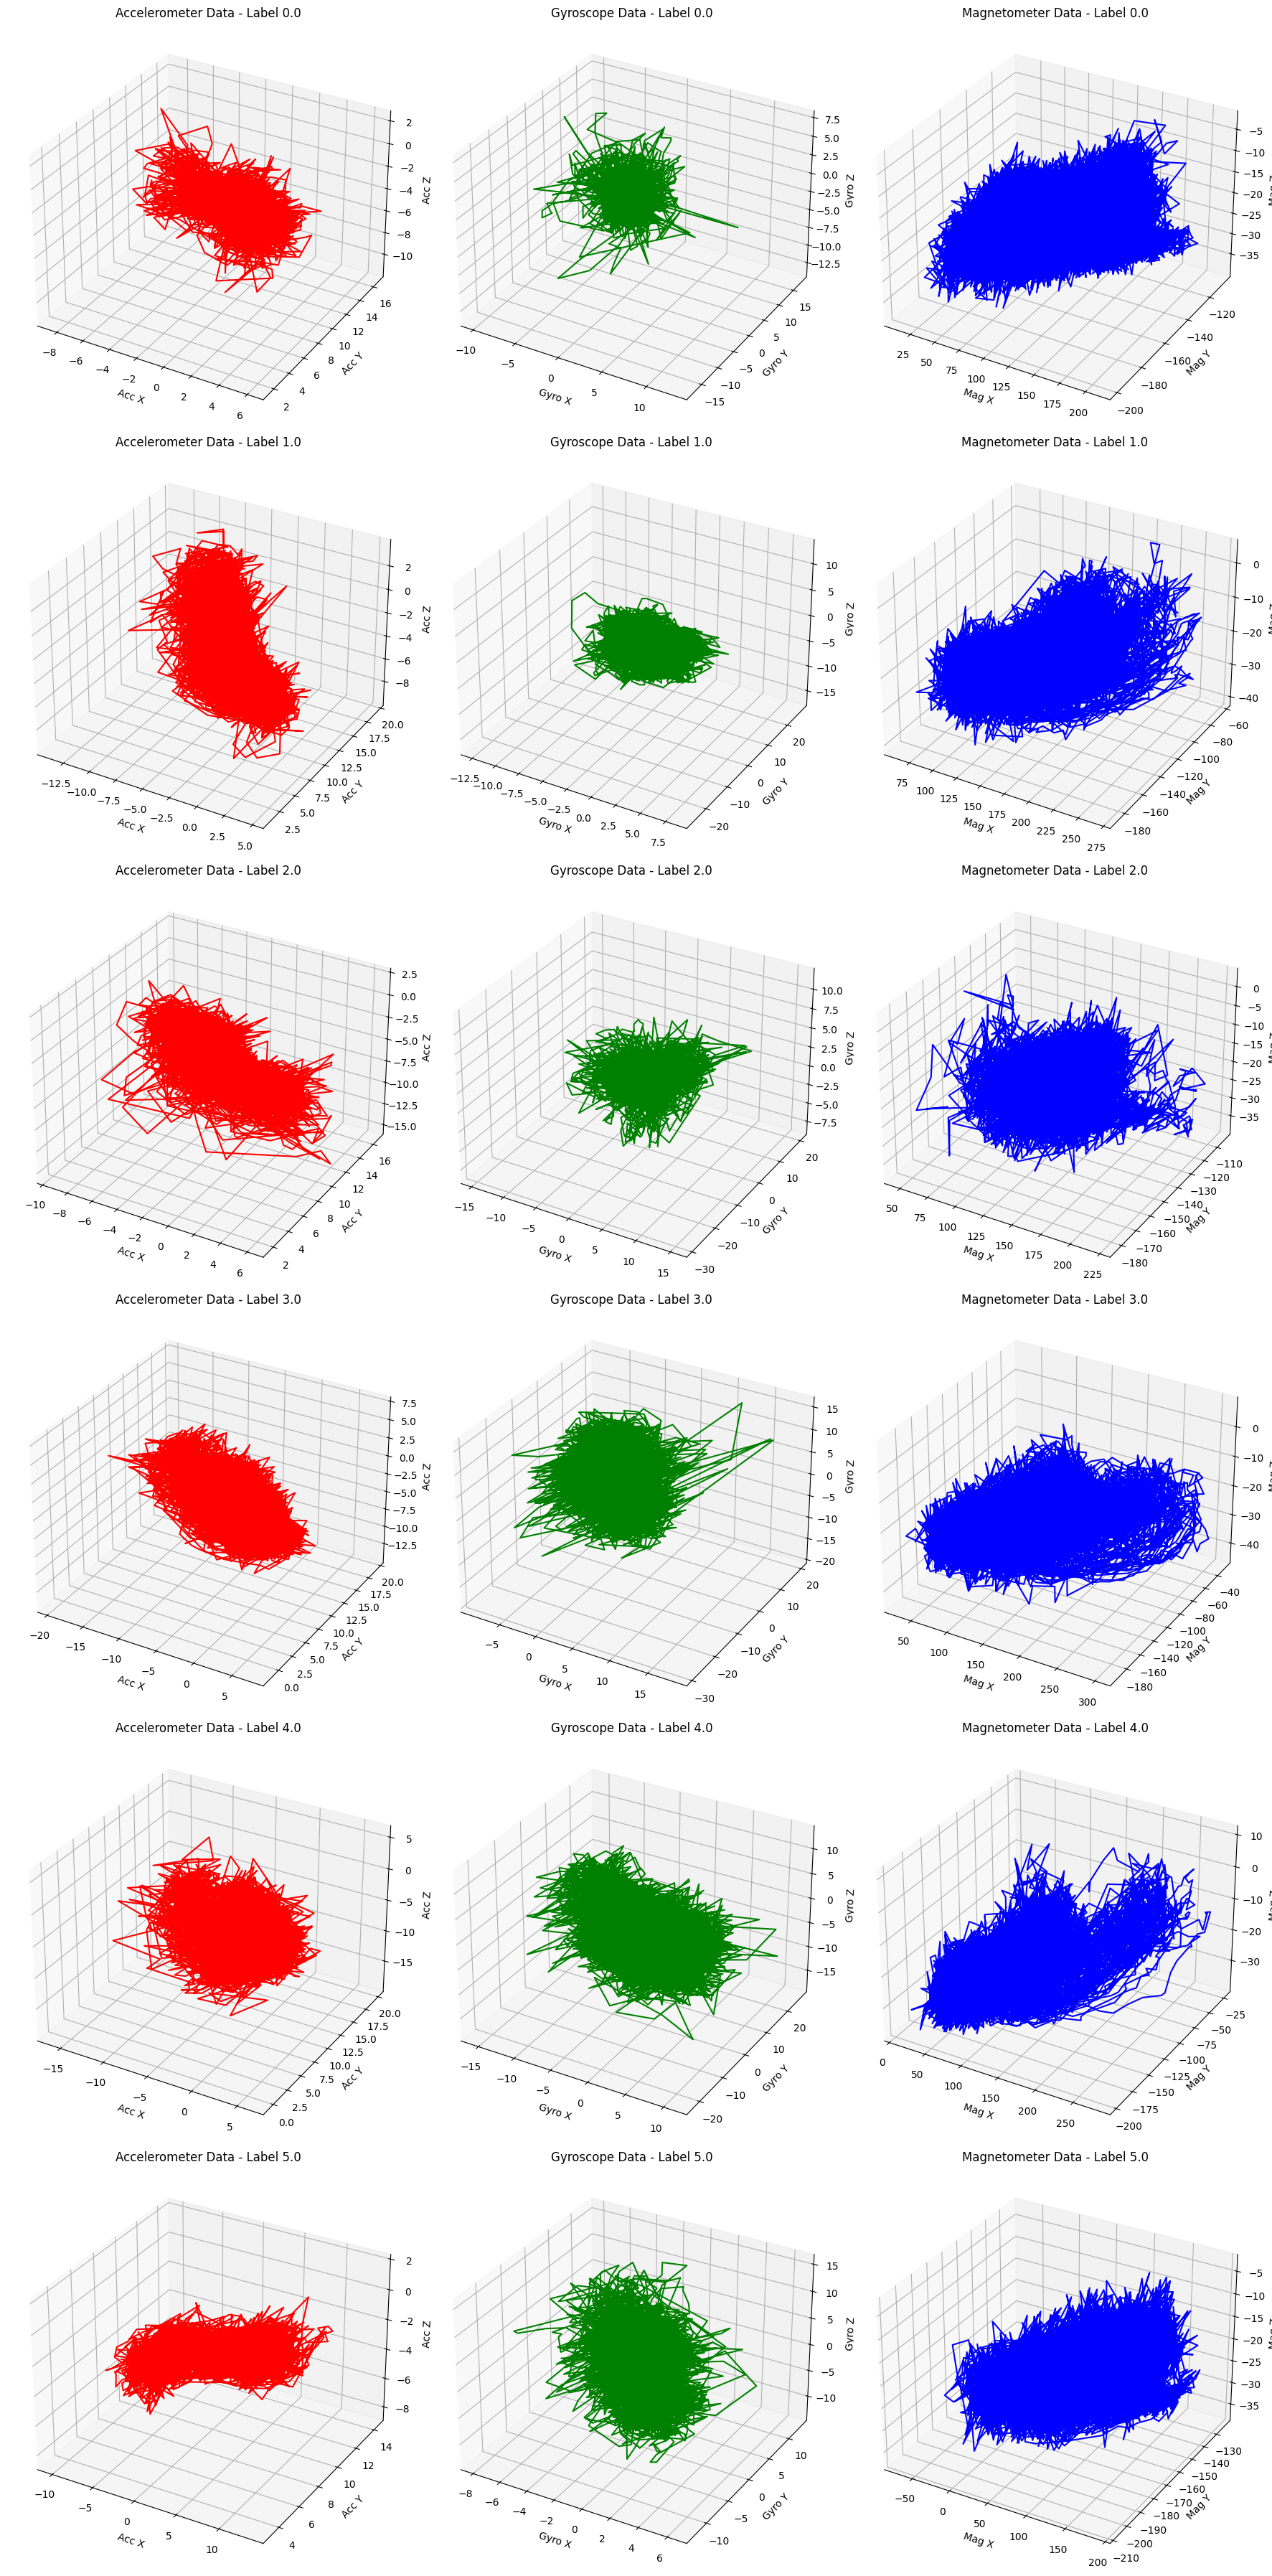

In [4]:
import matplotlib.pyplot as plt

def plot_3d_sensor_data(df):
    # Get unique labels
    labels = df['label'].unique()

    # Create a figure for plotting
    fig = plt.figure(figsize=(18, 6 * len(labels)))

    for i, label in enumerate(labels, start=1):
        # Filter the DataFrame for the current label
        filtered_df = df[df['label'] == label]

        # Plotting Accelerometer Data
        ax1 = fig.add_subplot(len(labels), 3, 3*i-2, projection='3d')
        ax1.plot(filtered_df['sensor_accX'], filtered_df['sensor_accY'], filtered_df['sensor_accZ'], c='r')
        ax1.set_title(f'Accelerometer Data - Label {label}')
        ax1.set_xlabel('Acc X')
        ax1.set_ylabel('Acc Y')
        ax1.set_zlabel('Acc Z')

        # Plotting Gyroscope Data
        ax2 = fig.add_subplot(len(labels), 3, 3*i-1, projection='3d')
        ax2.plot(filtered_df['sensor_gyroX'], filtered_df['sensor_gyroY'], filtered_df['sensor_gyroZ'], c='g' )
        ax2.set_title(f'Gyroscope Data - Label {label}')
        ax2.set_xlabel('Gyro X')
        ax2.set_ylabel('Gyro Y')
        ax2.set_zlabel('Gyro Z')

        # Plotting Magnetometer Data
        ax3 = fig.add_subplot(len(labels), 3, 3*i, projection='3d')
        ax3.plot(filtered_df['sensor_magX'], filtered_df['sensor_magY'], filtered_df['sensor_magZ'], c='b')
        ax3.set_title(f'Magnetometer Data - Label {label}')
        ax3.set_xlabel('Mag X')
        ax3.set_ylabel('Mag Y')
        ax3.set_zlabel('Mag Z')

    plt.tight_layout()
    plt.show()

plot_3d_sensor_data(aggregate_df)

label
0.0    563
5.0    382
4.0    377
3.0    373
2.0    288
1.0    287
Name: count, dtype: int64


,Window ID,accelerometer_x_mean,accelerometer_x_min,accelerometer_x_max,accelerometer_y_mean,accelerometer_y_min,accelerometer_y_max,accelerometer_z_mean,accelerometer_z_min,accelerometer_z_max,gyroscope_x_mean,gyroscope_x_min,gyroscope_x_max,gyroscope_y_mean,gyroscope_y_min,gyroscope_y_max,gyroscope_z_mean,gyroscope_z_min,gyroscope_z_max,label
0,0,2.283291,1.815962,2.784954,8.855052,7.841654,9.667785,-2.645646,-3.444107,-2.157502,-0.016311,-0.609760,1.074702,0.261130,-1.920744,1.745438,-0.763115,-1.532022,0.160062,0.0
1,1,1.243420,-0.199182,2.542108,8.876525,7.854215,9.767076,-3.011171,-3.926809,-2.025910,0.039177,-0.708846,0.815554,0.100610,-1.920744,1.493912,-1.151074,-2.804896,-0.236282,0.0
2,2,-0.122871,-2.203559,2.313617,8.968005,7.854215,10.474680,-3.136434,-3.926809,-2.478106,-0.236130,-1.890256,0.815554,0.014787,-1.128056,0.739334,-0.783237,-2.804896,1.135678,0.0
3,3,-1.863790,-9.457238,1.662837,8.884122,3.046342,14.540855,-2.340282,-5.230760,1.923628,-1.416777,-7.446694,6.158576,1.601687,-10.205858,10.525982,-1.928671,-11.394890,9.718050,1.0
4,4,-1.769977,-9.457238,0.464757,9.004528,6.387569,14.540855,-2.607150,-4.459754,1.923628,1.414796,-0.693602,6.158576,-1.329429,-10.205858,1.714950,1.265709,-3.246972,9.718050,1.0


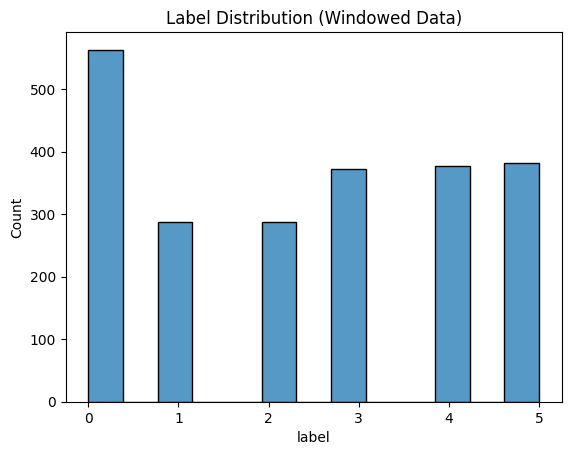

In [5]:
feature_df = DataUtility.get_feature_df(aggregate_df,window_size=50,overlap_size=10,drop_window_id=False)
feature_df.head()

label
0.0    563
5.0    382
4.0    377
3.0    373
2.0    288
1.0    287
Name: count, dtype: int64


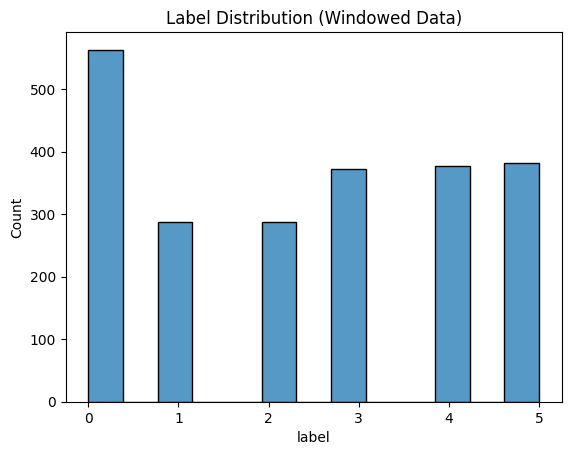

In [6]:
# Plot label distribution
EvaluationUtility.plot_label_distribution(feature_df)

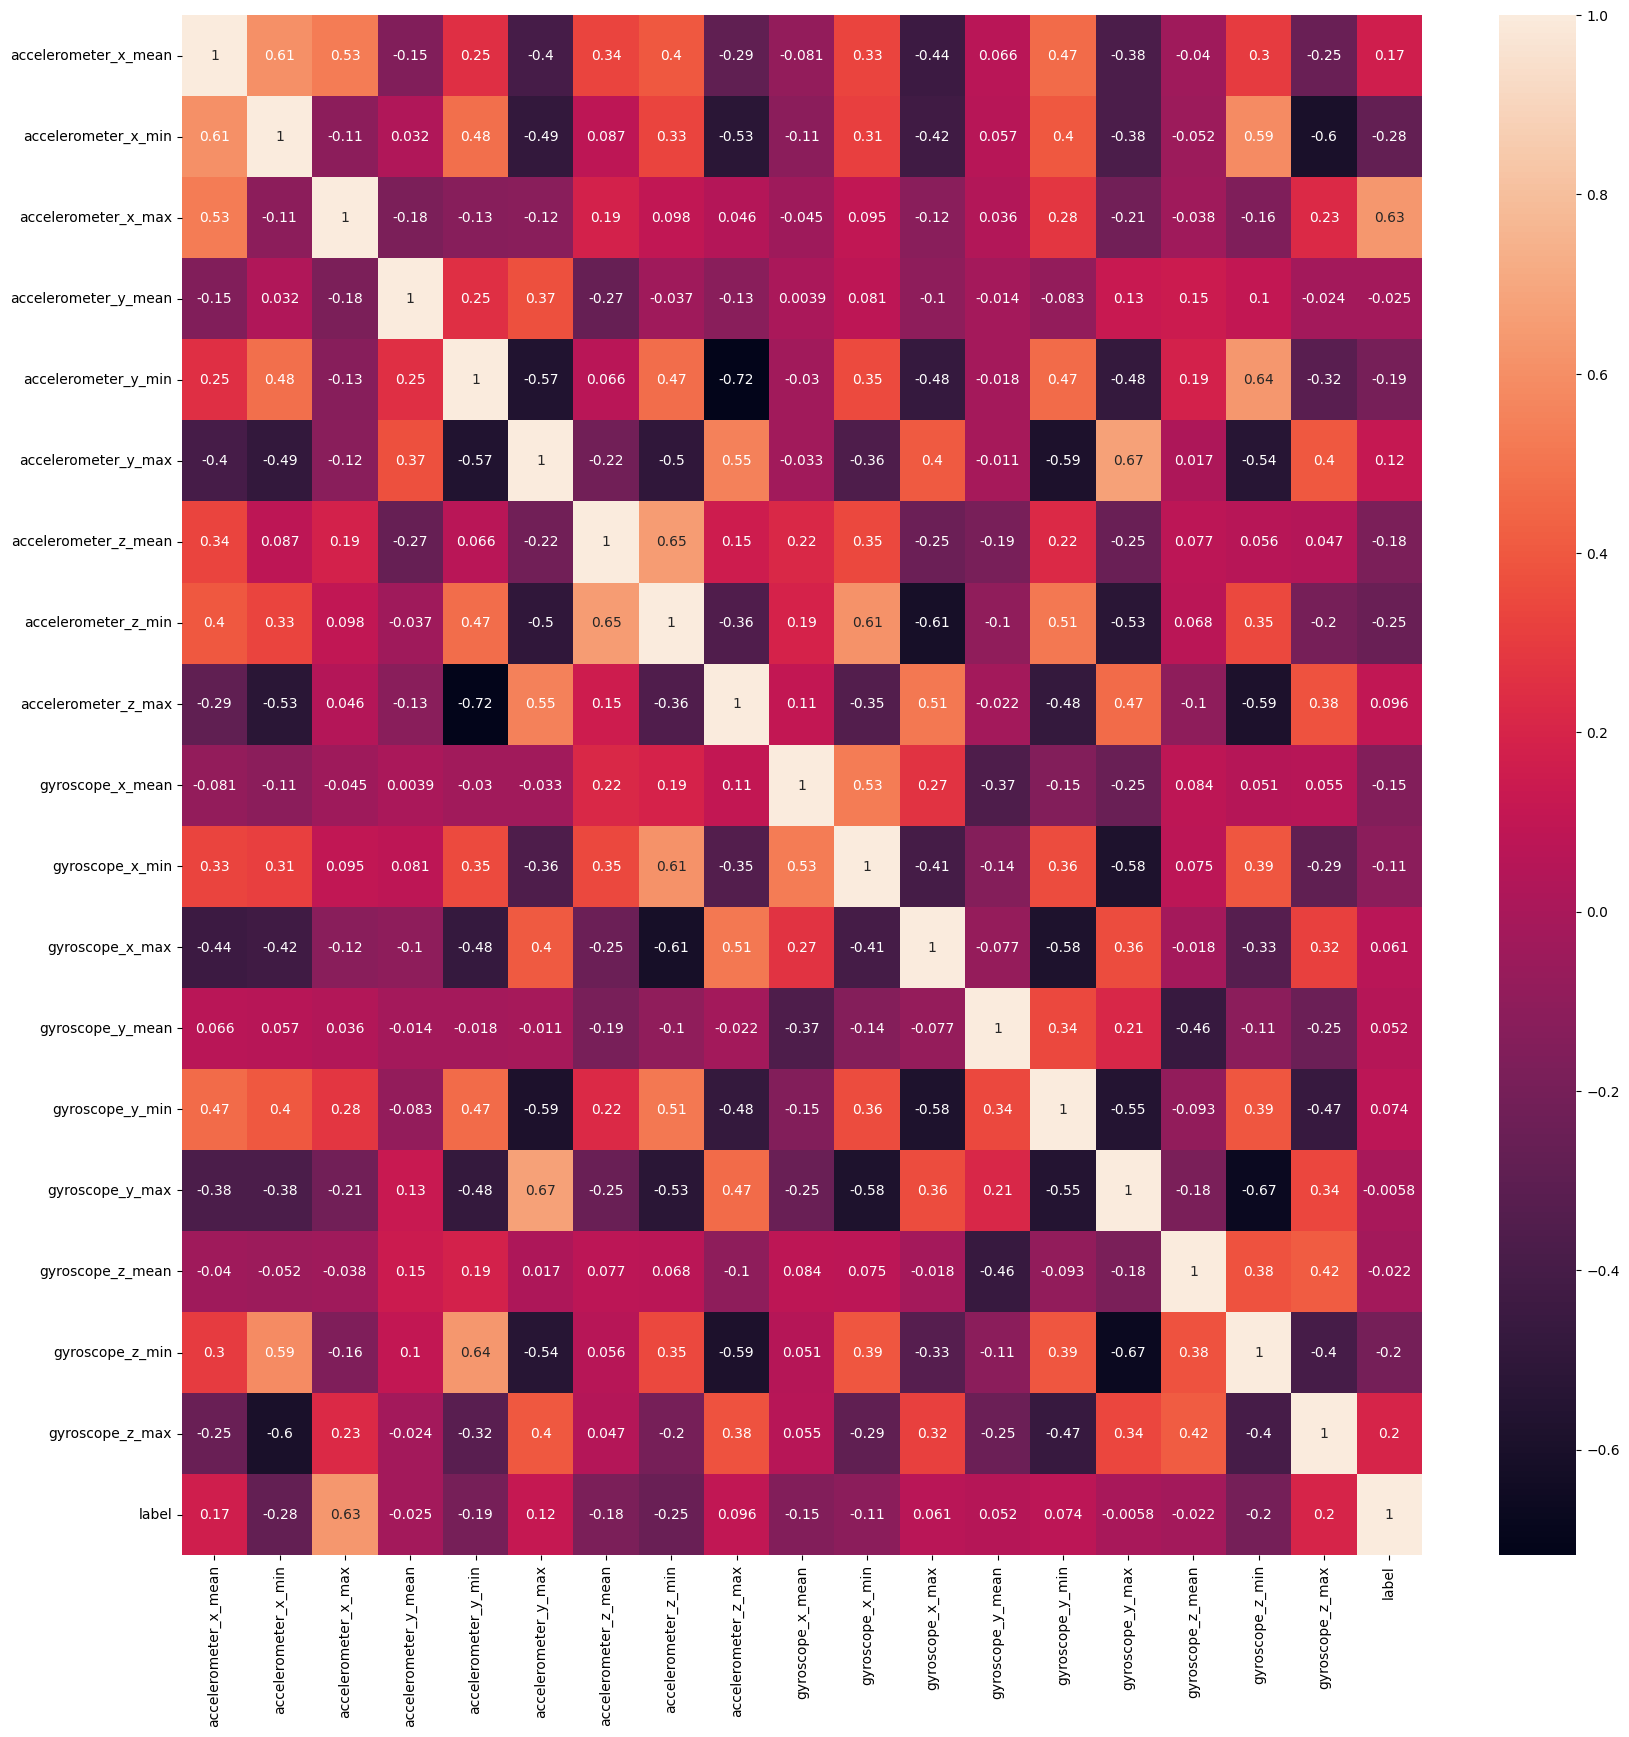

In [7]:
# Plot correlation matrix (drop window_id)
EvaluationUtility.plot_df_correlations(feature_df.drop(columns=['Window ID']))